# **Main Goal: Create an CNN that can detect "hot spots" from thermal images**

# **Get The Data**

In [1]:
#Import The Essentials

#Import Modules
import tensorflow as tf
import numpy as np
from tensorflow import keras

#Import Pillow Image Tools
import PIL
import PIL.Image

#Display Version of TensorFlow
print("TensorFlow Version:", tf.__version__)

#Print Number of GPUs being Used
print("The Number of GPUs Available is: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow Version: 2.7.0
The Number of GPUs Available is:  1


In [2]:
#Load The Dataset

#Allow Google Colab to Access Files
from google.colab import files

#Names Dataset "data"
data = files.upload()

#Confirms Upload
for fn in data.keys():
  print('\nUser uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(data[fn])))

#Unzip Data
from zipfile import ZipFile

with ZipFile('binary_cnn.zip', 'r') as unzipped_data:
  unzipped_data.extractall('/content/data')

print('\nThe data was successfully unzipped! See the unzipped data below:')

#Confirm that Data was Unzipped
!ls '/content/data'

#Message If Folder Isn't Showing:
print('\nIf you cannot see the folder in the directory list, hit the directory refresh button (middle button)')

#Delete the Original .zip File
!rm cnn_dataset.zip
print('\nThe original zip file has been deleted to free up space within the environment.')

Saving binary_cnn.zip to binary_cnn.zip


### Source for the following cells: https://www.tensorflow.org/tutorials/load_data/images

In [3]:
#Get the Dataset Working
import pathlib
dataset = '/content/data/binary_cnn'
fire_data = pathlib.Path(dataset)

In [4]:
#Figure Out Number of Images in Dataset
image_count = len(list(fire_data.glob('*/*.jpg')))
print(image_count)

3396


In [5]:
#Create A Dataset

#Define Parameters
batch_size = 10000
img_height = 64
img_width = 64

In [6]:
#Create the Training Dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    fire_data,
    validation_split = 0.25,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width), 
    batch_size=batch_size
)

Found 3396 files belonging to 2 classes.
Using 2547 files for training.


In [7]:
#Create the Testing Dataset
testing_set = tf.keras.utils.image_dataset_from_directory(
    fire_data,
    validation_split = 0.25,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width), 
    batch_size=batch_size
)

Found 3396 files belonging to 2 classes.
Using 849 files for validation.


In [8]:
#Create The Class Names
class_names = training_set.class_names
print(class_names)

['fire', 'no_fire']


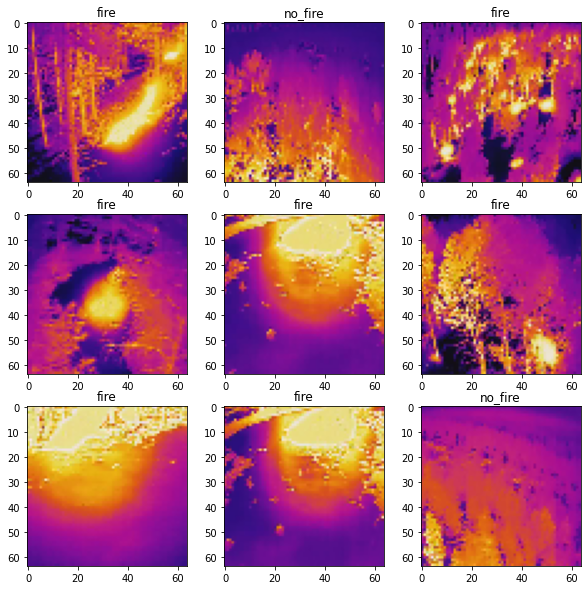

In [9]:
#Import MatPlotLib
import matplotlib.pyplot as plt

#Plot First 9 Images from Training Dataset
plt.figure(figsize=(10, 10))
for images, labels in training_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

# Converting to NumPy Arrays (Attempt 1)

## Convert Training Set To NumPy Arrays

Video Tutorial Link: https://www.youtube.com/watch?v=7ZOIbkA9eqI

In [102]:
#Import Essentials
import tensorflow_datasets as tfds

In [103]:
#Converting the Images
x_train = None

for image, labels in tfds.as_numpy(training_set):
  print(type(image))
  x_train = image

x_train.shape

<class 'numpy.ndarray'>


(2547, 64, 64, 3)

In [104]:
#Converting the Labels
y_train = None

for image, labels in tfds.as_numpy(training_set):
  type(labels)
  y_train = labels

y_train.shape

(2547,)

In [105]:
#Changing the Image Type from "unit8" to "float32"
x_train = x_train.astype('float32')/255

#Changing the Label Type from "unit8" to "int64"
y_train = y_train.astype('int64')

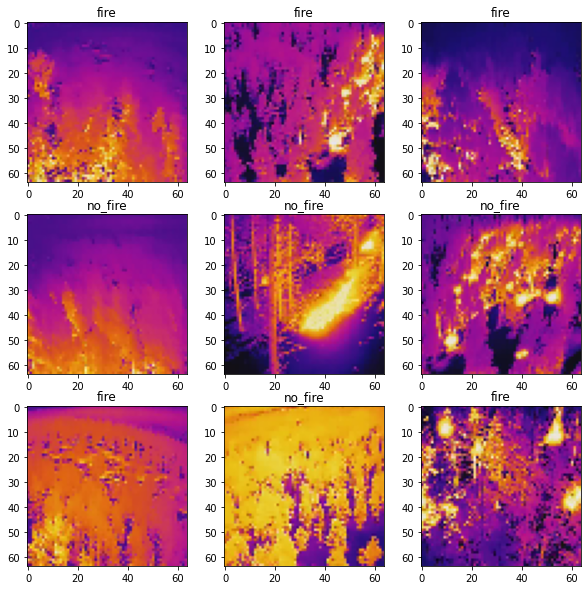

In [111]:
#Plotting Images To See if Successful

#Change Size of Images in Plot
plt.figure(figsize=(10, 10))

#For Loop to Plot Images
for i in range(9):  
  
  #Define Subplot
  plt.subplot(3, 3, i+1)

  #Plot Raw Image Pixel Data
  plt.imshow(x_train[i])

  #Attach Labels
  plt.title(class_names[y_train[i]])

#Show Images
plt.show()

## Converting Testing Set to NumPy Arrays

In [107]:
#Converting the Images
x_test = None

for image, labels in tfds.as_numpy(testing_set):
  print(type(image))
  x_test = image
   
x_test.shape

<class 'numpy.ndarray'>


(849, 64, 64, 3)

In [108]:
#Converting the Labels
y_test = None

for image, labels in tfds.as_numpy(testing_set):
  type(labels)
  y_test = labels

y_test.shape

(849,)

In [109]:
#Changing the Image Type from "unit8" to "float32"
x_test = x_test.astype('float32')/255

#Changing the Label Type from "unit8" to "int64"
y_test = y_train.astype('int64')

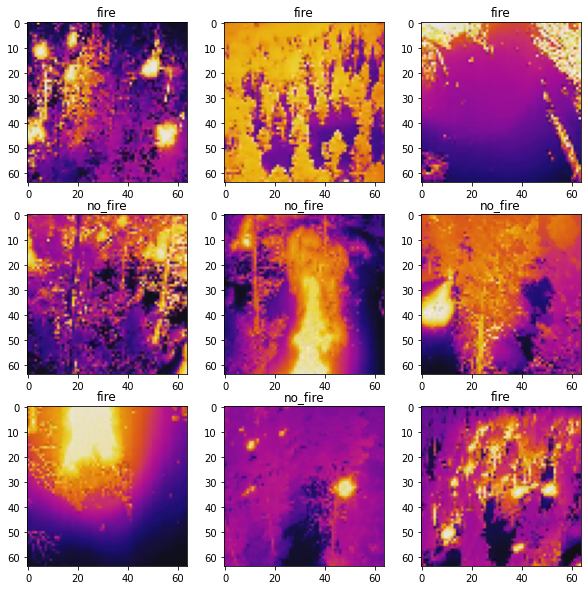

In [110]:
#Plotting Images To See if Successful

#Change Size of Images in Plot
plt.figure(figsize=(10, 10))

#For Loop to Plot Images
for i in range(9):  
  
  #Define Subplot
  plt.subplot(3, 3, i+1)

  #Plot Raw Image Pixel Data
  plt.imshow(x_test[i])

  #Attach Labels
  plt.title(class_names[y_test[i]])

#Show Images
plt.show()

# Converting to NumPy Arrays (Attempt 2)

## Converting the Training Set

Batch Dataset:
Images Shape: (2547, 64, 64, 3)
Labels Shape: (2547,)

Training Set
Image Class Type: <class 'numpy.ndarray'>
Images Shape: (2547, 64, 64, 3)
Labels Class Type: <class 'numpy.ndarray'>
Images Shape: (2547,)


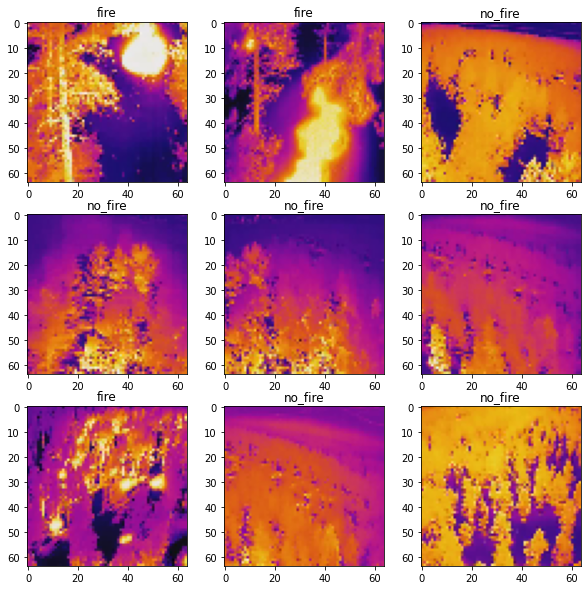

In [10]:
#Confirm Shapes (Batch Dataset)
for image_batch, labels_batch in training_set:
  print("Batch Dataset:")
  print("Images Shape:", image_batch.shape)
  print("Labels Shape:", labels_batch.shape)

#Convert To NumPy Arrays (Training Set)
for image_batch, labels_batch in training_set:
  print("\nTraining Set")
  x_train = np.array(image_batch)
  y_train = np.array(labels_batch)
  print("Image Class Type:", type(x_train))
  print("Images Shape:", x_train.shape)
  print("Labels Class Type:", type(y_train))
  print("Images Shape:", y_train.shape)

#Changing the Image Type from "unit8" to "float32"
x_train = x_train.astype('float32')/255

#Changing the Label Type from "unit8" to "int64"
y_train = y_train.astype('int64')
  

#Display First 9 Images of Training Set (To Verify Image and Label Match-Up)

#Change Size of Images in Plot
plt.figure(figsize=(10, 10))

#For Loop to Plot Images
for i in range(9):  
  
  #Define Subplot
  plt.subplot(3, 3, i+1)

  #Plot Raw Image Pixel Data
  plt.imshow(x_train[i])

  #Display Labels on Images
  plt.title(class_names[y_train[i]])

#Show Images
plt.show()

Testing Set
<class 'numpy.ndarray'>
(849, 64, 64, 3)
<class 'numpy.ndarray'>
(849,)


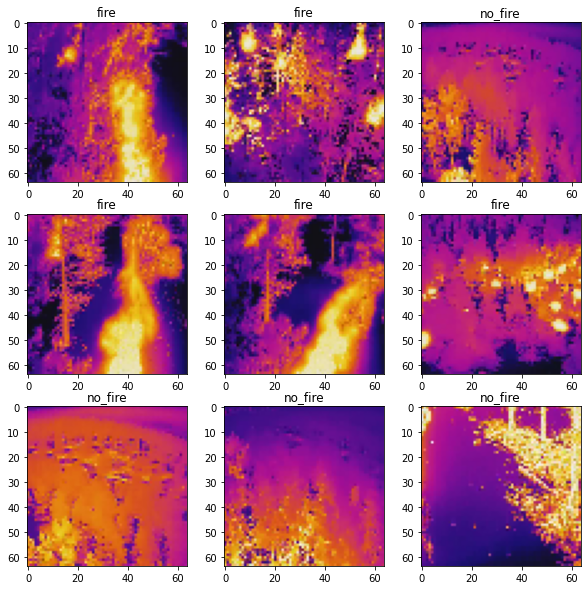

In [11]:
#Convert To NumPy Arrays (Testing Set)
for image_batch, labels_batch in testing_set:
  print("Testing Set")
  x_test = np.array(image_batch)
  y_test = np.array(labels_batch)
  print(type(x_train))
  print(x_test.shape)
  print(type(y_train))
  print(y_test.shape)

#Changing the Image Type from "unit8" to "float32"
x_test = x_test.astype('float32')/255

#Changing the Label Type from "unit8" to "int64"
y_test = y_test.astype('int64')

#Display First 9 Images of Training Set (To Verify Image and Label Match-Up)

#Change Size of Images in Plot
plt.figure(figsize=(10, 10))

#For Loop to Plot Images
for i in range(9):  
  
  #Define Subplot
  plt.subplot(3, 3, i+1)

  #Plot Raw Image Pixel Data
  plt.imshow(x_test[i])

  #Display Labels on Images
  plt.title(class_names[y_test[i]])

#Show Images
plt.show()

# Grayscale The Images of the Whole Dataset

The Shape of the NumPy Training Set is:  (2547, 64, 64, 1)
The Shape of the NumPy Testing Set is:  (849, 64, 64, 1)


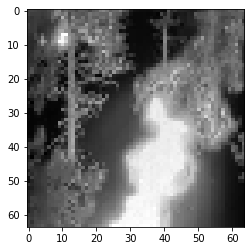

In [12]:
#Grayscale Training and Testing Sets
grayscale_x_train = tf.image.rgb_to_grayscale(x_train[:])
grayscale_x_test = tf.image.rgb_to_grayscale(x_test[:])

#Convert to NumPy Arrays and Check Shapes
grayscale_x_train = grayscale_x_train.numpy()
print('The Shape of the NumPy Training Set is: ', grayscale_x_train.shape)

grayscale_x_test = grayscale_x_test.numpy()
print('The Shape of the NumPy Testing Set is: ', grayscale_x_test.shape)

#Display the First Image of the Training Set
gray_image = tf.image.rgb_to_grayscale(x_train[1])
plt.imshow (tf.squeeze(gray_image), cmap = 'gray')

#The Testable Model Blueprint...

In [13]:
#Convolutional Neural Network
cnn = tf.keras.Sequential([
      
    #Convolutional Layer #1
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (6, 6), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (64, 64, 1)),

    #Pooling Layer #1
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #2
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),

    #Pooling Layer #2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Flatten Output
    tf.keras.layers.Flatten(),

    #Dense Layer #1
    tf.keras.layers.Dense(128, activation = 'relu'),

    #Dense Layer #2
    tf.keras.layers.Dense(64, activation = 'relu'),

    #Dense Layer #3
    tf.keras.layers.Dense(32, activation = 'relu'),

    #Dense Layer #4
    tf.keras.layers.Dense(16, activation = 'relu'),

    #Dense Layer #5
    tf.keras.layers.Dense(8, activation = 'relu'),

    #Dense Layer #6
    tf.keras.layers.Dense(4, activation = 'softmax'),

])

In [14]:
#Compile The Model
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
#Model Summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        1184      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [16]:
#Train The Model
EPOCHS = 5
history = cnn.fit(
    grayscale_x_train, y_train,
    batch_size = 12, epochs = EPOCHS, validation_split = 0.1, verbose = 1,
)

Epoch 1/5
191/191 [==============================] - 10s 11ms/step - loss: 0.5365 - accuracy: 0.7395 - val_loss: 0.2675 - val_accuracy: 0.9176
Epoch 2/5
191/191 [==============================] - 2s 10ms/step - loss: 0.2583 - accuracy: 0.8927 - val_loss: 0.1721 - val_accuracy: 0.9451
Epoch 3/5
191/191 [==============================] - 2s 9ms/step - loss: 0.1457 - accuracy: 0.9459 - val_loss: 0.1142 - val_accuracy: 0.9608
Epoch 4/5
191/191 [==============================] - 2s 9ms/step - loss: 0.0934 - accuracy: 0.9673 - val_loss: 0.0893 - val_accuracy: 0.9608
Epoch 5/5
191/191 [==============================] - 2s 9ms/step - loss: 0.0822 - accuracy: 0.9712 - val_loss: 0.0972 - val_accuracy: 0.9647


In [17]:
#Evaluate The Model
test_loss, test_acc = cnn.evaluate(grayscale_x_test, y_test, verbose = 1)
print('The Test Set Loss is: {0:0.4f} and the Test Set Accuracy is: {1:0.4}%'.format(test_loss, 100*test_acc))

27/27 [==============================] - 0s 8ms/step - loss: 0.1216 - accuracy: 0.9658
The Test Set Loss is: 0.1216 and the Test Set Accuracy is: 96.58%


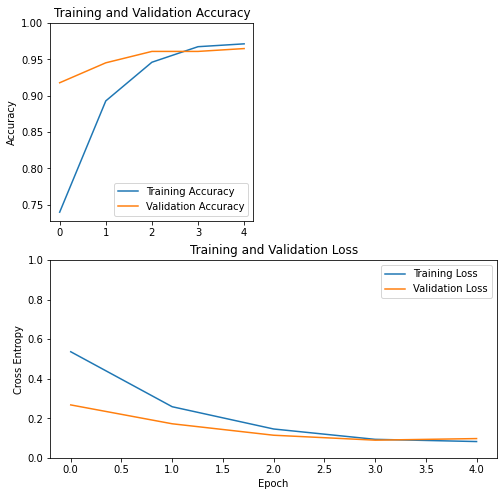

In [18]:
#Import MatPlotLib
import matplotlib.pyplot as plt

#Define Variables
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#Plot First Graph
plt.figure(figsize = (8, 8))
plt.subplot(2, 2, 1)
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

#Plot the Second Graph
plt.subplot(2, 1, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

The model predicts the following image to be a member of Class 0, which translates to fire.


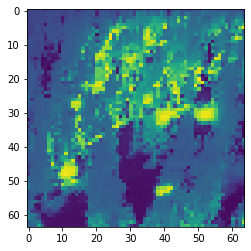

In [22]:
#Make Prediction
prediction = cnn.predict(grayscale_x_test[592].reshape(1, 64, 64, 1))
np_predict = np.argmax(prediction)
print("The model predicts the following image to be a member of Class {}".format(np_predict) + ", which translates to {}".format(class_names[np_predict]) + '.')

#Show Image
plt.imshow(grayscale_x_test[592].reshape(64, 64))